In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# **EKSPLORASI DATA**

In [5]:
df = pd.read_csv ('best-selling-manga.csv')
df

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
...,...,...,...,...,...,...,...,...
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58


Jadi untuk analisis pada kali ini, saya menggunakan dataset tentang penjualan manga di Jepang. Sebelum melakukan analisis data dilakukan, alangkah baiknya sistem mengimpor data terlebih dahulu.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


In [7]:
df.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,187.000000,187.000000,187.000000
mean,46.048128,50.764332,1.377380
std,34.678288,57.178028,1.240013
min,5.000000,20.000000,0.190000
25%,23.500000,24.500000,0.670000
50%,34.000000,31.000000,1.030000
75%,56.500000,50.500000,1.650000
max,207.000000,516.600000,10.000000


In [8]:
# Memisahkan kolom numerik dan kategorik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Memisahkan kolom numerik dan kategorik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Membuat dataframe terpisah
df_numeric = df[numeric_columns]
df_categorical = df[categorical_columns]

# Menampilkan hasil
print("Kolom Numerik:")
print(numeric_columns.tolist())

print("\nKolom Kategorik:")
print(categorical_columns.tolist())

Kolom Numerik:
['No. of collected volumes', 'Approximate sales in million(s)', 'Average sales per volume in million(s)']

Kolom Kategorik:
['Manga series', 'Author(s)', 'Publisher', 'Demographic', 'Serialized']


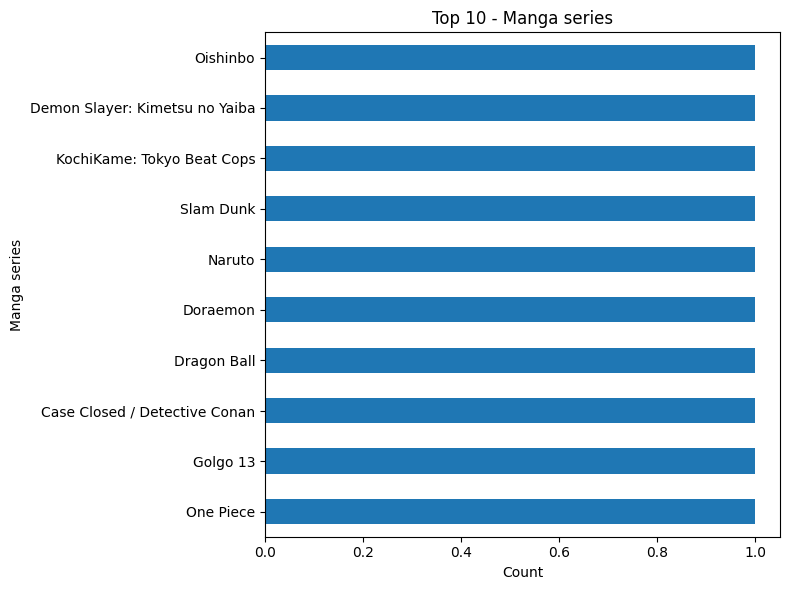

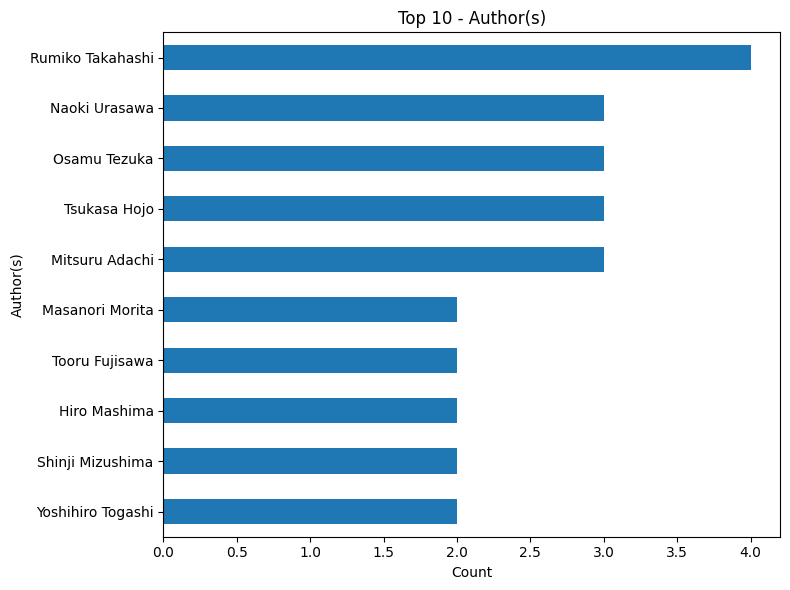

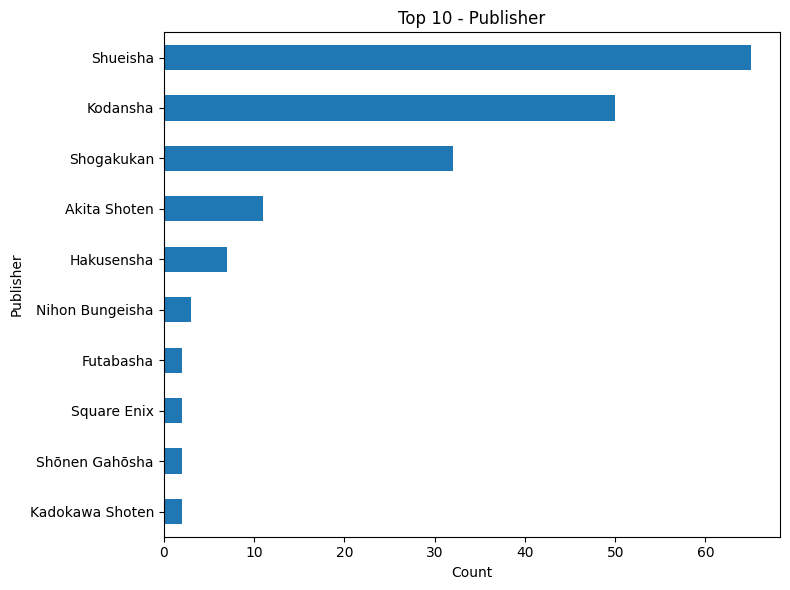

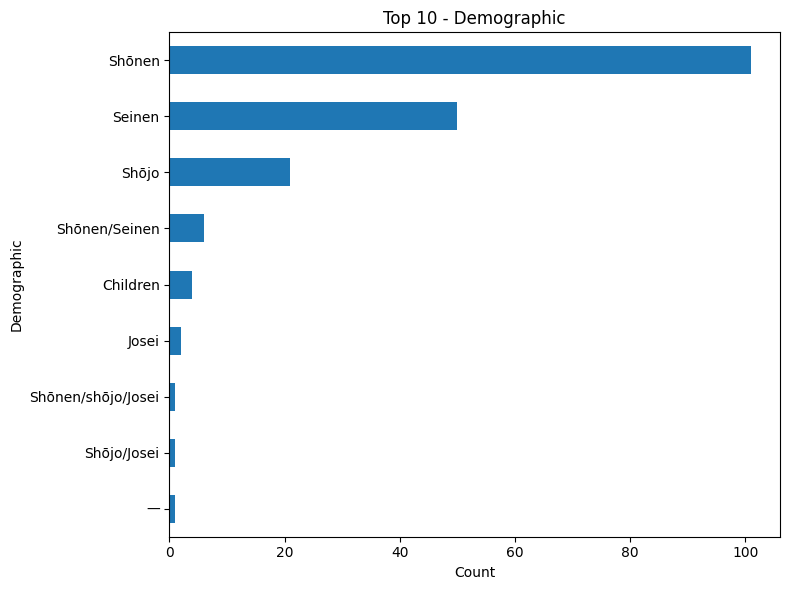

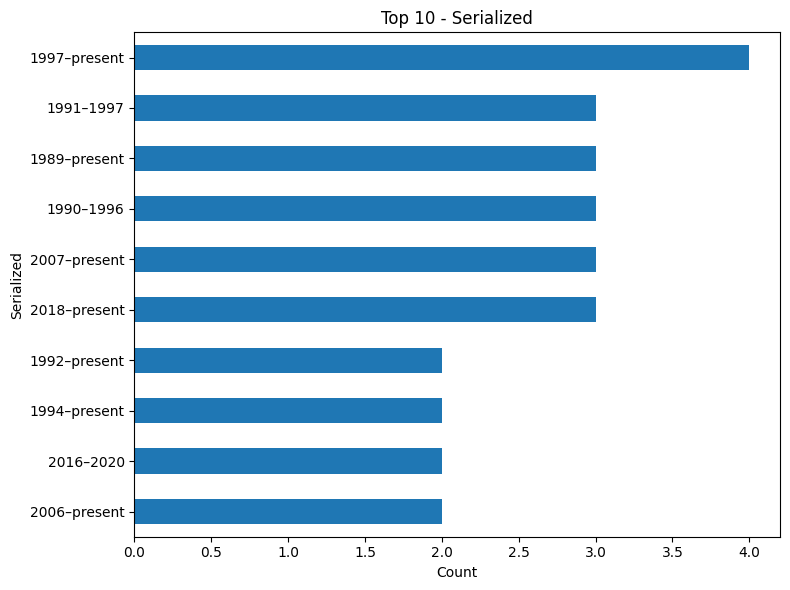

In [9]:
top_n = 10

for col in categorical_columns:
    plt.figure(figsize=(8, 6))

    top_categories = df[col].value_counts().head(top_n)

    top_categories.sort_values().plot(kind='barh')

    plt.title(f"Top {top_n} - {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

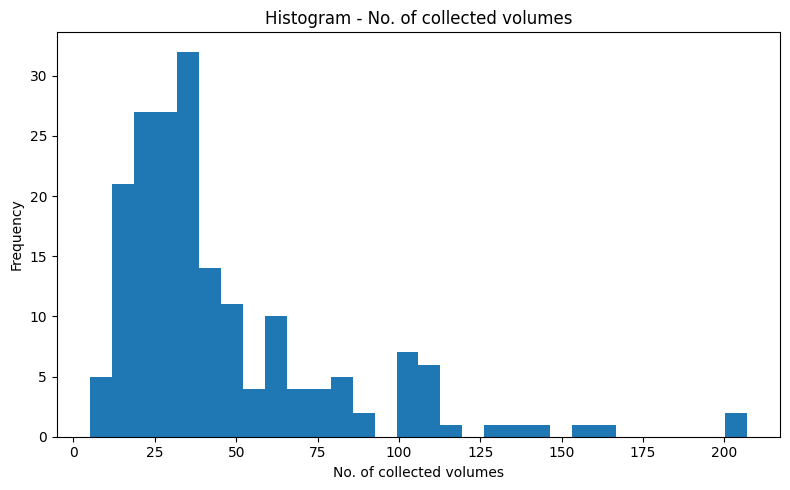

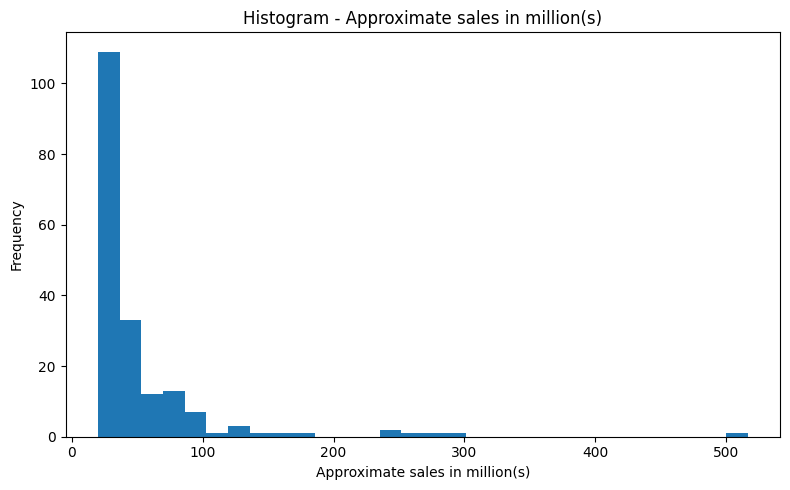

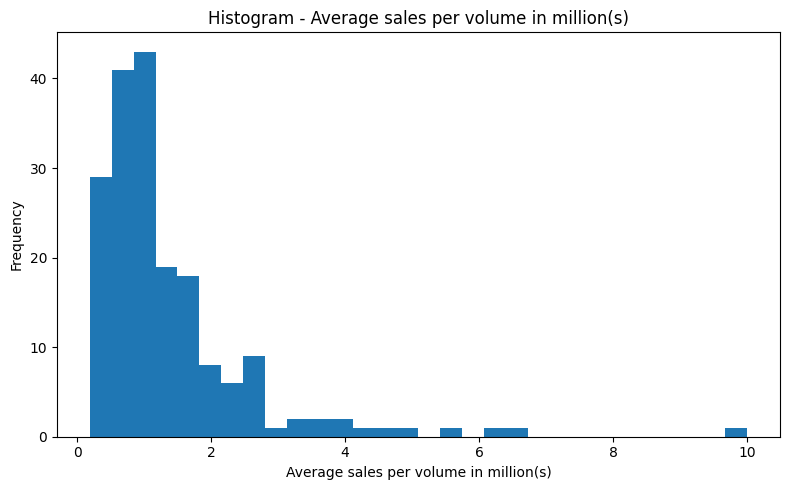

In [10]:
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

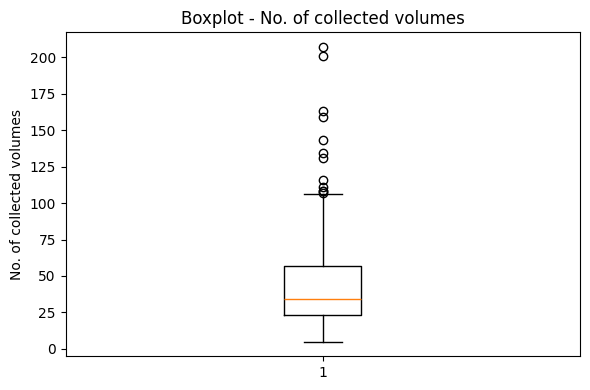

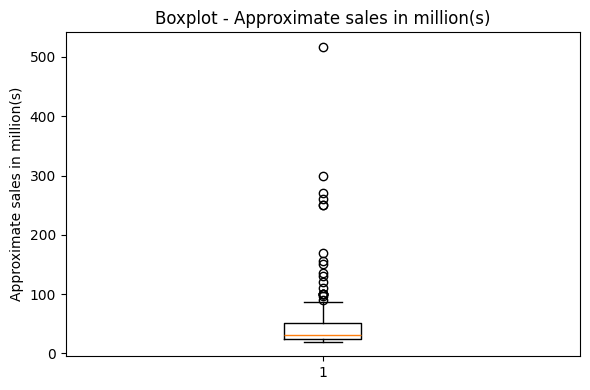

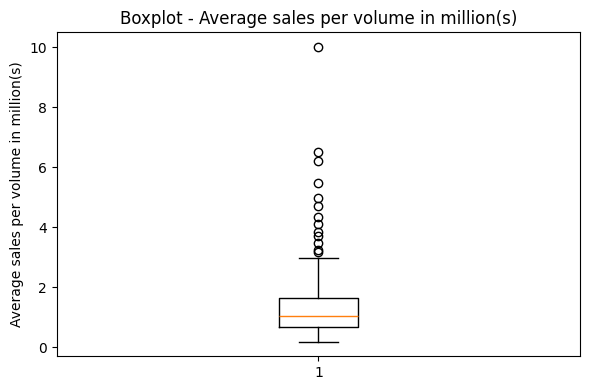

In [11]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot - {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

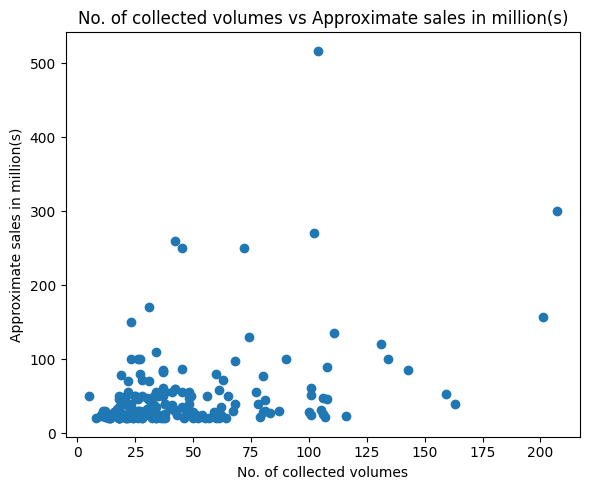

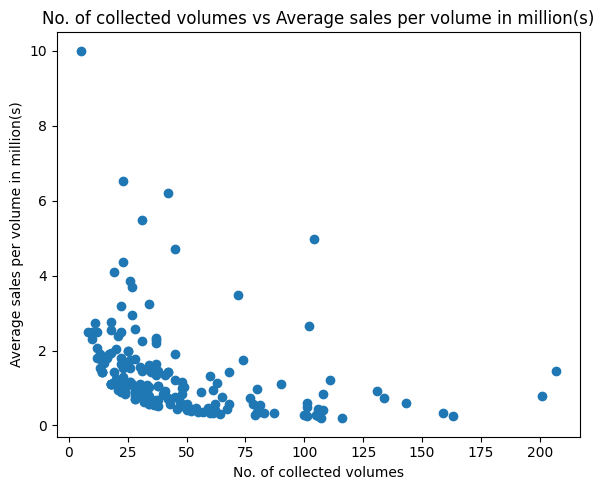

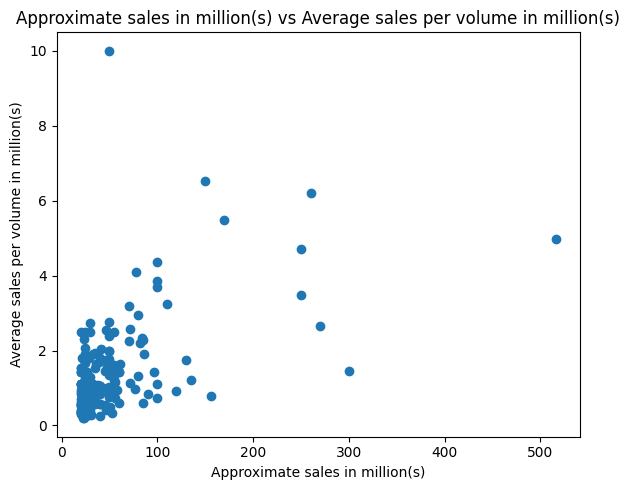

In [12]:
# Ambil kombinasi pasangan numerik
for col1, col2 in itertools.combinations(numeric_columns, 2):
    plt.figure(figsize=(6, 5))
    plt.scatter(df[col1], df[col2])
    plt.title(f"{col1} vs {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

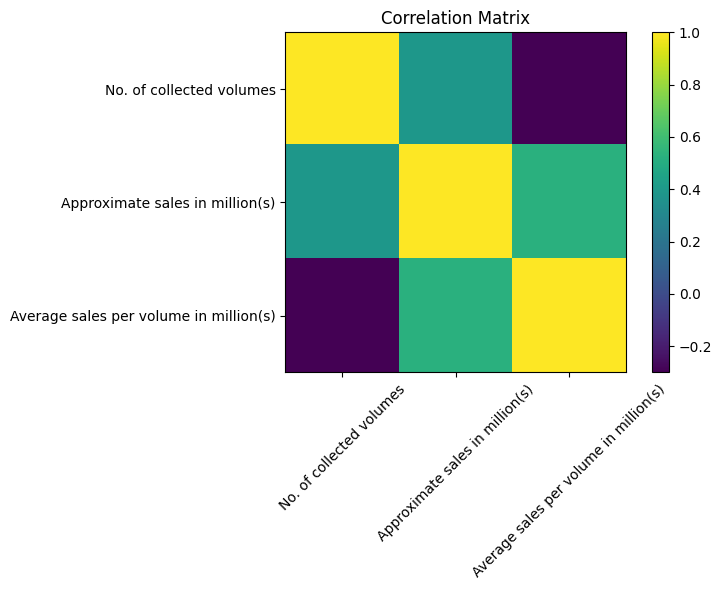

In [13]:
corr = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

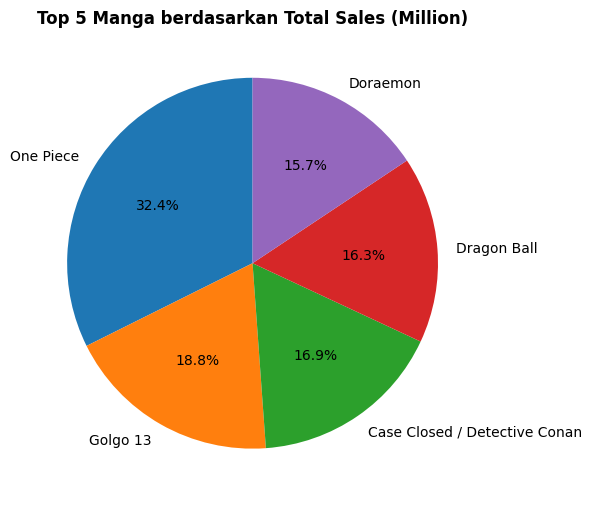

In [18]:
import matplotlib.pyplot as plt

# Urutkan berdasarkan total sales (descending)
top5 = df.sort_values(
    by="Approximate sales in million(s)",
    ascending=False
).head(5)

plt.figure(figsize=(6,6))

plt.pie(
    top5["Approximate sales in million(s)"],
    labels=top5["Manga series"],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Top 5 Manga berdasarkan Total Sales (Million)",
          fontweight='bold')

plt.ylabel("")  # Menghapus label sumbu Y agar clean
plt.tight_layout()
plt.show()

# **IDENTIFIKASI MASALAH**

In [20]:
# Missing values per kolom
print("=== Missing value per kolom ===")
print(df.isna().sum())
print()

=== Missing value per kolom ===
Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
Kategori                                  0
dtype: int64



In [21]:
# Jumlah baris duplikat
print("=== Jumlah baris duplikat ===")
print(df.duplicated().sum())
print()

=== Jumlah baris duplikat ===
0



In [22]:
# 2.3 Nilai unik dan frekuensi untuk kolom kategorik
cat_cols = ["Publisher", "Demographic", "Serialized"]
for col in cat_cols:
    print(f"=== Value counts kolom {col} ===")
    print(df[col].value_counts())
    print()

=== Value counts kolom Publisher ===
Publisher
Shueisha                                     65
Kodansha                                     50
Shogakukan                                   32
Akita Shoten                                 11
Hakusensha                                    7
Nihon Bungeisha                               3
Kadokawa Shoten                               2
Shōnen Gahōsha                                2
Futabasha                                     2
Square Enix                                   2
Kobunsha                                      1
Enix (2001–2003), Square Enix (2003–2010)     1
Ushio Shuppansha                              1
Shueisha/Kodansha                             1
Jitsugyo no Nihon Sha                         1
Shinchosha, Tokuma Shoten                     1
Square Enix, Ichijinsha                       1
Gakken                                        1
Enix                                          1
Ushio Shuppan                            

In [23]:
# Range dasar untuk kolom numerik
num_cols = [
    "No. of collected volumes",
    "Approximate sales in million(s)",
    "Average sales per volume in million(s)",
]
print("=== Ringkasan statistik numerik ===")
print(df[num_cols].describe())
print()

=== Ringkasan statistik numerik ===
       No. of collected volumes  Approximate sales in million(s)  \
count                187.000000                       187.000000   
mean                  46.048128                        50.764332   
std                   34.678288                        57.178028   
min                    5.000000                        20.000000   
25%                   23.500000                        24.500000   
50%                   34.000000                        31.000000   
75%                   56.500000                        50.500000   
max                  207.000000                       516.600000   

       Average sales per volume in million(s)  
count                              187.000000  
mean                                 1.377380  
std                                  1.240013  
min                                  0.190000  
25%                                  0.670000  
50%                                  1.030000  
75%            

In [24]:
# nilai yang mencurigakan (<= 0) pada kolom numerik
print("Nilai numerik <= 0")
for col in num_cols:
    suspicious = df[df[col] <= 0]
    print(f"\nKolom {col}: {len(suspicious)} baris")
    if not suspicious.empty:
        print(suspicious[["Manga series", col]].head())

Nilai numerik <= 0

Kolom No. of collected volumes: 0 baris

Kolom Approximate sales in million(s): 0 baris

Kolom Average sales per volume in million(s): 0 baris


In [25]:
# Pilih kolom numerik yang mau dicek outlier
num_cols = [
    "No. of collected volumes",
    "Approximate sales in million(s)",
    "Average sales per volume in million(s)",
]

In [26]:
# Fungsi bantu: hitung batas IQR dan flag outlier
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (series < lower) | (series > upper)
    return {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower": lower,
        "upper": upper,
        "n_outliers": int(mask.sum()),
        "mask": mask,
    }

In [27]:
# Deteksi outlier per kolom
outlier_masks = {}
for col in num_cols:
    info = detect_outliers_iqr(df[col])
    outlier_masks[col] = info["mask"]
    print(f"=== {col} ===")
    print(f"Q1   : {info['Q1']}")
    print(f"Q3   : {info['Q3']}")
    print(f"IQR  : {info['IQR']}")
    print(f"Lower: {info['lower']}")
    print(f"Upper: {info['upper']}")
    print(f"Jumlah outlier: {info['n_outliers']}")
    print()

=== No. of collected volumes ===
Q1   : 23.5
Q3   : 56.5
IQR  : 33.0
Lower: -26.0
Upper: 106.0
Jumlah outlier: 12

=== Approximate sales in million(s) ===
Q1   : 24.5
Q3   : 50.5
IQR  : 26.0
Lower: -14.5
Upper: 89.5
Jumlah outlier: 20

=== Average sales per volume in million(s) ===
Q1   : 0.67
Q3   : 1.65
IQR  : 0.9799999999999999
Lower: -0.7999999999999997
Upper: 3.1199999999999997
Jumlah outlier: 13



In [29]:
# Contoh: lihat beberapa baris yang outlier di kolom sales total
col = "Approximate sales in million(s)"
print("=== Contoh outlier di kolom", col, "===")
print(df.loc[outlier_masks[col], ["Manga series", col]].head())

# 6. STRATEGI HANDLING (pilih salah satu sesuai kebutuhan)

# 6a. Hapus baris yang outlier di salah satu kolom numerik
df_no_outlier = df[~(outlier_masks[num_cols[0]] |
                     outlier_masks[num_cols[1]] |
                     outlier_masks[num_cols[2]])]

=== Contoh outlier di kolom Approximate sales in million(s) ===
                    Manga series  Approximate sales in million(s)
0                      One Piece                            516.6
1                       Golgo 13                            300.0
2  Case Closed / Detective Conan                            270.0
3                    Dragon Ball                            260.0
4                       Doraemon                            250.0


In [30]:
# Kolom numerik yang mau dinormalisasi
num_cols = [
    "No. of collected volumes",
    "Approximate sales in million(s)",
    "Average sales per volume in million(s)",
]

In [34]:
# MIN-MAX SCALING [0,1]
mm_scaler = MinMaxScaler()
df_mm = df.copy()
df_mm[[col + "_minmax" for col in num_cols]] = mm_scaler.fit_transform(df[num_cols])

print("=== Contoh hasil Min-Max Scaling ===")
print(df_mm[[c for c in df_mm.columns if "minmax" in c]].head())
print()

=== Contoh hasil Min-Max Scaling ===
   No. of collected volumes_minmax  Approximate sales in million(s)_minmax  \
0                         0.490099                                1.000000   
1                         1.000000                                0.563834   
2                         0.480198                                0.503423   
3                         0.183168                                0.483286   
4                         0.198020                                0.463149   

   Average sales per volume in million(s)_minmax  
0                                       0.487258  
1                                       0.128440  
2                                       0.250765  
3                                       0.611621  
4                                       0.460754  



In [35]:
# --- B. Z-SCORE STANDARDIZATION (mean=0, std=1) ---
zs_scaler = StandardScaler()
df_zs = df.copy()
df_zs[[col + "_zscore" for col in num_cols]] = zs_scaler.fit_transform(df[num_cols])

print("=== Contoh hasil Z-Score ===")
print(df_zs[[c for c in df_zs.columns if "zscore" in c]].head())
print()

=== Contoh hasil Z-Score ===
   No. of collected volumes_zscore  Approximate sales in million(s)_zscore  \
0                         1.675615                                8.168981   
1                         4.653746                                4.370643   
2                         1.617787                                3.844558   
3                        -0.117047                                3.669196   
4                        -0.030305                                3.493834   

   Average sales per volume in million(s)_zscore  
0                                       2.905022  
1                                       0.058721  
2                                       1.029051  
3                                       3.891524  
4                                       2.694784  



In [36]:
# Kalau mau, kamu bisa gabungkan ke satu DataFrame besar:
df_scaled = df.copy()
df_scaled = pd.concat(
    [df_scaled, df_mm[[c for c in df_mm.columns if "minmax" in c]],
                 df_zs[[c for c in df_zs.columns if "zscore" in c]]],
    axis=1
)

print("=== Bentuk akhir df_scaled ===")
print(df_scaled.head())

=== Bentuk akhir df_scaled ===
                    Manga series                      Author(s)   Publisher  \
0                      One Piece                   Eiichiro Oda    Shueisha   
1                       Golgo 13  Takao Saito, Saito Production  Shogakukan   
2  Case Closed / Detective Conan                   Gosho Aoyama  Shogakukan   
3                    Dragon Ball                 Akira Toriyama    Shueisha   
4                       Doraemon                Fujiko F. Fujio  Shogakukan   

  Demographic  No. of collected volumes    Serialized  \
0      Shōnen                       104  1997–present   
1      Seinen                       207  1968–present   
2      Shōnen                       102  1994–present   
3      Shōnen                        42     1984–1995   
4    Children                        45     1969–1996   

   Approximate sales in million(s)  Average sales per volume in million(s)  \
0                            516.6                                    4.9